In [10]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt

In [2]:
dataset_folder = "Agriculture/"
db_data = "data.db"
conn = sqlite3.connect(db_data)

In [3]:
fetch_by_name = lambda table_name: pd.read_sql_query(f'SELECT * FROM {table_name}', conn)
fetch_by_id = lambda id: fetch_by_name(dataset_table_names[id])

In [4]:
dataset_table_names = []
i = 0
for dataset_file_name in sorted(os.listdir(dataset_folder)):
    table_name = dataset_file_name.split('.')[0]
    df = pd.read_stata(os.path.join(dataset_folder, dataset_file_name)).rename(columns = {"hhid16": "hhid"})
    i+=1
    print("Dataset #" + str(i), dataset_file_name,"with the length of", len(df), "is loaded into database. It was stored in a table named", table_name + ".")
    if df['hhid'].nunique() != len(df): print("Note: hhid in", table_name, 'is not unique.')
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    dataset_table_names.append(table_name);

Dataset #1 agr0.dta with the length of 2529 is loaded into database. It was stored in a table named agr0.
Dataset #2 agr1.dta with the length of 2529 is loaded into database. It was stored in a table named agr1.
Dataset #3 agr10_1.dta with the length of 1044 is loaded into database. It was stored in a table named agr10_1.
Note: hhid in agr10_1 is not unique.
Dataset #4 agr10_1a.dta with the length of 1813 is loaded into database. It was stored in a table named agr10_1a.
Dataset #5 agr10_3.dta with the length of 23569 is loaded into database. It was stored in a table named agr10_3.
Note: hhid in agr10_3 is not unique.
Dataset #6 agr11.dta with the length of 1885 is loaded into database. It was stored in a table named agr11.
Dataset #7 agr2_234.dta with the length of 3006 is loaded into database. It was stored in a table named agr2_234.
Note: hhid in agr2_234 is not unique.
Dataset #8 agr2_5.dta with the length of 3855 is loaded into database. It was stored in a table named agr2_5.
Note:

In [5]:
print(len(fetch_by_id(0)), "respondents participated in the survey.")

2529 respondents participated in the survey.


## Module 1: FARM AND LAND USE

a301 - Does the household own/cultivate any plot of land? <br>
a302 - How many plots or parcels of land does the household own? (in numbers; include household garden if used for agricultural purposes) <br>
a303 - Organizational type of the household

In [6]:
_ = fetch_by_id(1)

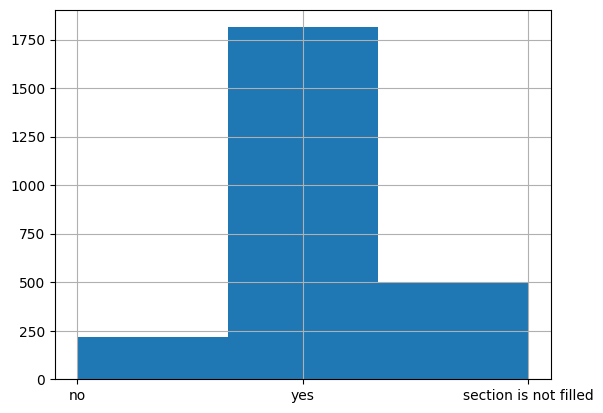

In [11]:
_['a301'].hist(bins=3)
plt.show()

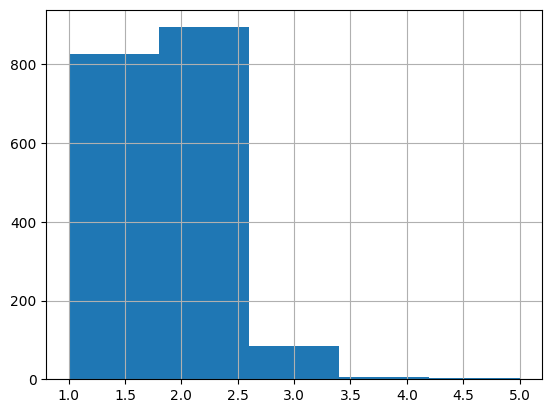

In [12]:
_['a302'].hist(bins = _['a302'].nunique())
plt.show()

IndentationError: unexpected indent (769243345.py, line 3)